# 2D CNN UCI-HAR

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from sklearn.metrics import classification_report, confusion_matrix
from keras.layers import Dense, Dropout, Flatten
from pathlib import Path
import seaborn as sns

In [4]:
cd C:\Users\Callum Murton\OneDrive\Documents\Callum\Uni Work\Data Analytics MSc\Dissertation Project\Experiment\Data Preprocessing\Data\Window Data

C:\Users\Callum Murton\OneDrive\Documents\Callum\Uni Work\Data Analytics MSc\Dissertation Project\Experiment\Data Preprocessing\Data\Window Data


## Importing the Data

In [6]:
# function to import the datasets
# dataset_short is the first part of the dataset name, e.g. UCI-HAR is UCI
# the data type is either features of labels
# the window size is the time in seconds a window lasts, 1.5 and 2.5 seconds should be written as 1_5 and 2_5, respectively
# the overlap is a percentage
def import_data(dataset, dataset_short, features_or_labels, data_type, window_size, overlap):
    path = f'{dataset}/{dataset_short}_{features_or_labels}_{data_type}_{window_size}_sec_{overlap}ol.npy'
    if Path(path).is_file():
        data = np.load(path)
        return data
    else:
        return None

In [7]:
# import the various datasets
X_train_UCI_1_25 = import_data('UCI-HAR','UCI','features','train','1','25')
X_test_UCI_1_25 = import_data('UCI-HAR','UCI','features','test','1','25')
y_train_UCI_1_25 = import_data('UCI-HAR','UCI','labels','train','1','25')
y_test_UCI_1_25 = import_data('UCI-HAR','UCI','labels','test','1','25')

X_train_UCI_1_50 = import_data('UCI-HAR','UCI','features','train','1','50')
X_test_UCI_1_50 = import_data('UCI-HAR','UCI','features','test','1','50')
y_train_UCI_1_50 = import_data('UCI-HAR','UCI','labels','train','1','50')
y_test_UCI_1_50 = import_data('UCI-HAR','UCI','labels','test','1','50')

X_train_UCI_1_75 = import_data('UCI-HAR','UCI','features','train','1','75')
X_test_UCI_1_75 = import_data('UCI-HAR','UCI','features','test','1','75')
y_train_UCI_1_75 = import_data('UCI-HAR','UCI','labels','train','1','75')
y_test_UCI_1_75 = import_data('UCI-HAR','UCI','labels','test','1','75')

X_train_UCI_1_5_25 = import_data('UCI-HAR','UCI','features','train','1_5','25')
X_test_UCI_1_5_25 = import_data('UCI-HAR','UCI','features','test','1_5','25')
y_train_UCI_1_5_25 = import_data('UCI-HAR','UCI','labels','train','1_5','25')
y_test_UCI_1_5_25 = import_data('UCI-HAR','UCI','labels','test','1_5','25')

X_train_UCI_1_5_50 = import_data('UCI-HAR','UCI','features','train','1_5','50')
X_test_UCI_1_5_50 = import_data('UCI-HAR','UCI','features','test','1_5','50')
y_train_UCI_1_5_50 = import_data('UCI-HAR','UCI','labels','train','1_5','50')
y_test_UCI_1_5_50 = import_data('UCI-HAR','UCI','labels','test','1_5','50')

X_train_UCI_1_5_75 = import_data('UCI-HAR','UCI','features','train','1_5','75')
X_test_UCI_1_5_75 = import_data('UCI-HAR','UCI','features','test','1_5','75')
y_train_UCI_1_5_75 = import_data('UCI-HAR','UCI','labels','train','1_5','75')
y_test_UCI_1_5_75 = import_data('UCI-HAR','UCI','labels','test','1_5','75')

X_train_UCI_2_25 = import_data('UCI-HAR','UCI','features','train','2','25')
X_test_UCI_2_25 = import_data('UCI-HAR','UCI','features','test','2','25')
y_train_UCI_2_25 = import_data('UCI-HAR','UCI','labels','train','2','25')
y_test_UCI_2_25 = import_data('UCI-HAR','UCI','labels','test','2','25')

X_train_UCI_2_50 = import_data('UCI-HAR','UCI','features','train','2','50')
X_test_UCI_2_50 = import_data('UCI-HAR','UCI','features','test','2','50')
y_train_UCI_2_50 = import_data('UCI-HAR','UCI','labels','train','2','50')
y_test_UCI_2_50 = import_data('UCI-HAR','UCI','labels','test','2','50')

X_train_UCI_2_75 = import_data('UCI-HAR','UCI','features','train','2','75')
X_test_UCI_2_75 = import_data('UCI-HAR','UCI','features','test','2','75')
y_train_UCI_2_75 = import_data('UCI-HAR','UCI','labels','train','2','75')
y_test_UCI_2_75 = import_data('UCI-HAR','UCI','labels','test','2','75')

X_train_UCI_2_5_25 = import_data('UCI-HAR','UCI','features','train','2','25')
X_test_UCI_2_5_25 = import_data('UCI-HAR','UCI','features','test','2','25')
y_train_UCI_2_5_25 = import_data('UCI-HAR','UCI','labels','train','2','25')
y_test_UCI_2_5_25 = import_data('UCI-HAR','UCI','labels','test','2','25')

X_train_UCI_2_5_50 = import_data('UCI-HAR','UCI','features','train','2','50')
X_test_UCI_2_5_50 = import_data('UCI-HAR','UCI','features','test','2','50')
y_train_UCI_2_5_50 = import_data('UCI-HAR','UCI','labels','train','2','50')
y_test_UCI_2_5_50 = import_data('UCI-HAR','UCI','labels','test','2','50')

X_train_UCI_2_5_75 = import_data('UCI-HAR','UCI','features','train','2_5','75')
X_test_UCI_2_5_75 = import_data('UCI-HAR','UCI','features','test','2_5','75')
y_train_UCI_2_5_75 = import_data('UCI-HAR','UCI','labels','train','2_5','75')
y_test_UCI_2_5_75 = import_data('UCI-HAR','UCI','labels','test','2_5','75')

In [8]:
# zero offset the class values
y_test_UCI_1_25 = y_test_UCI_1_25.astype(int) - 1
y_train_UCI_1_25 = y_train_UCI_1_25.astype(int) - 1

y_test_UCI_1_50 = y_test_UCI_1_50.astype(int) - 1
y_train_UCI_1_50 = y_train_UCI_1_50.astype(int) - 1

y_test_UCI_1_75 = y_test_UCI_1_75.astype(int) - 1
y_train_UCI_1_75 = y_train_UCI_1_75.astype(int) - 1

y_test_UCI_1_5_25 = y_test_UCI_1_5_25.astype(int) - 1
y_train_UCI_1_5_25 = y_train_UCI_1_5_25.astype(int) - 1

y_test_UCI_1_5_50 = y_test_UCI_1_5_50.astype(int) - 1
y_train_UCI_1_5_50 = y_train_UCI_1_5_50.astype(int) - 1

y_test_UCI_1_5_75 = y_test_UCI_1_5_75.astype(int) - 1
y_train_UCI_1_5_75 = y_train_UCI_1_5_75.astype(int) - 1

y_test_UCI_2_25 = y_test_UCI_2_25.astype(int) - 1
y_train_UCI_2_25 = y_train_UCI_2_25.astype(int) - 1

y_test_UCI_2_50 = y_test_UCI_2_50.astype(int) - 1
y_train_UCI_2_50 = y_train_UCI_2_50.astype(int) - 1

y_test_UCI_2_75 = y_test_UCI_2_75.astype(int) - 1
y_train_UCI_2_75 = y_train_UCI_2_75.astype(int) - 1

y_test_UCI_2_5_25 = y_test_UCI_2_5_25.astype(int) - 1
y_train_UCI_2_5_25 = y_train_UCI_2_5_25.astype(int) - 1

y_test_UCI_2_5_50 = y_test_UCI_2_5_50.astype(int) - 1
y_train_UCI_2_5_50 = y_train_UCI_2_5_50.astype(int) - 1

y_test_UCI_2_5_75 = y_test_UCI_2_5_75.astype(int) - 1
y_train_UCI_2_5_75 = y_train_UCI_2_5_75.astype(int) - 1

In [10]:
# One hot encode the test sets
y_test_cat_UCI_1_25 = keras.utils.to_categorical(y_test_UCI_1_25)
y_train_cat_UCI_1_25 = keras.utils.to_categorical(y_train_UCI_1_25)

y_test_cat_UCI_1_50 = keras.utils.to_categorical(y_test_UCI_1_50)
y_train_cat_UCI_1_50 = keras.utils.to_categorical(y_train_UCI_1_50)

y_test_cat_UCI_1_75 = keras.utils.to_categorical(y_test_UCI_1_75)
y_train_cat_UCI_1_75 = keras.utils.to_categorical(y_train_UCI_1_75)

y_test_cat_UCI_1_5_25 = keras.utils.to_categorical(y_test_UCI_1_5_25)
y_train_cat_UCI_1_5_25 = keras.utils.to_categorical(y_train_UCI_1_5_25)

y_test_cat_UCI_1_5_50 = keras.utils.to_categorical(y_test_UCI_1_5_50)
y_train_cat_UCI_1_5_50 = keras.utils.to_categorical(y_train_UCI_1_5_50)

y_test_cat_UCI_1_5_75 = keras.utils.to_categorical(y_test_UCI_1_5_75)
y_train_cat_UCI_1_5_75 = keras.utils.to_categorical(y_train_UCI_1_5_75)

y_test_cat_UCI_2_25 = keras.utils.to_categorical(y_test_UCI_2_25)
y_train_cat_UCI_2_25 = keras.utils.to_categorical(y_train_UCI_2_25)

y_test_cat_UCI_2_50 = keras.utils.to_categorical(y_test_UCI_2_50)
y_train_cat_UCI_2_50 = keras.utils.to_categorical(y_train_UCI_2_50)

y_test_cat_UCI_2_75 = keras.utils.to_categorical(y_test_UCI_2_75)
y_train_cat_UCI_2_75 = keras.utils.to_categorical(y_train_UCI_2_75)

y_test_cat_UCI_2_5_25 = keras.utils.to_categorical(y_test_UCI_2_5_25)
y_train_cat_UCI_2_5_25 = keras.utils.to_categorical(y_train_UCI_2_5_25)

y_test_cat_UCI_2_5_50 = keras.utils.to_categorical(y_test_UCI_2_5_50)
y_train_cat_UCI_2_5_50 = keras.utils.to_categorical(y_train_UCI_2_5_50)

y_test_cat_UCI_2_5_75 = keras.utils.to_categorical(y_test_UCI_2_5_75)
y_train_cat_UCI_2_5_75 = keras.utils.to_categorical(y_train_UCI_2_5_75)

## CNN Model

In [11]:
# creating model
def CNN(X_train, y_train, filters):
    # no. of activities for the units of the final fully connected layer
    no_activities = len(np.unique(y_train))
    # enables the stacking of layers into a model 
    model = Sequential()
    # stacking layers
    # first convolution
    model.add(Conv2D(filters=filters, kernel_size=(5,5),padding='same',input_shape=X_train.shape[1:], activation='relu'))
    # max pooling of size 2
    model.add(MaxPooling2D(2,2))
    # second convolution, filter size is doubled
    model.add(Conv2D(filters=filters*2,kernel_size=(3,3),padding='same',activation='relu'))
    # max pooling of size 2
    model.add(MaxPooling2D(2,2))
    # flattern the data
    model.add(Flatten())
    # fully connected layers
    model.add(Dense(units=100,activation='relu'))
    model.add(Dense(units=no_activities, activation='softmax'))
    # summarises the model
    model.summary()
    # compliing the model defines the loss function, optimiser and the metrics
    model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
    # returns the CNN model
    return model

In [15]:
# calls the model, fits and makes predictiosn for the UCI-HAR data
# prints the classifcation report metrics and creates a confusion matrix plot
def model_data_UCI(X_train, y_train, y_train_cat, X_test, y_test_cat, filters, epochs):
    # call the CNN model function
    model = CNN(X_train,y_train,filters)
    # defines early stopping monitor
    callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=3)
    # fits the CNN model
    model.fit(x=X_train, y=y_train_cat, epochs=epochs, batch_size=1000, validation_data=(X_test,y_test_cat), callbacks=[callback])
    # collects the loss, accuracy, validation loss and the validation accuracy as a dataframe
    model_feat = pd.DataFrame(model.history.history)
    # creates a sub dataframe of the loss and validation history from model_feat
    model_loss = model_feat[['loss','val_loss']]
    # plots the loss and val loss over time
    plt.plot(model_loss['loss'], label='training')
    plt.plot(model_loss['val_loss'], label='validation')
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(loc="upper right")
    # plt.savefig('val_loss.png',bbox_inches="tight")
    # using the model to make predictions of the test set
    y_pred = model.predict(X_test)
    # reverts the one-hot encoded labels to a list of activities
    y_pred = np.argmax(y_pred, axis=1)
    y_actual = np.argmax(y_test_cat, axis=1)
    # print classification metrics of the prediction 
    print(classification_report(y_actual,y_pred))
    # confusion matrix
    con_mat = confusion_matrix(y_actual,y_pred)
    # the activities in the dataset
    activities = ['Walking','Walking Upstairs','Walking Downstairs','Sitting','Standing','Laying']
    # a plot of the confusion matrix
    plt.figure(figsize=(16,14))
    sns.heatmap(con_mat, xticklabels=activities, yticklabels=activities, fmt='d',annot=True, cmap="Blues")
    sns.set(font_scale=1.5)
    plt.title("Confusion matrix", fontsize=30)
    plt.ylabel('Performed Activity', fontsize=26)
    plt.xlabel('Predicted Performed Activity', fontsize=26)
    plt.show()

### 1 Second

Model: "sequential_83"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_166 (Conv2D)         (None, 7, 7, 16)          2416      
                                                                 
 max_pooling2d_166 (MaxPooli  (None, 3, 3, 16)         0         
 ng2D)                                                           
                                                                 
 conv2d_167 (Conv2D)         (None, 3, 3, 32)          4640      
                                                                 
 max_pooling2d_167 (MaxPooli  (None, 1, 1, 32)         0         
 ng2D)                                                           
                                                                 
 flatten_83 (Flatten)        (None, 32)                0         
                                                                 
 dense_166 (Dense)           (None, 100)             

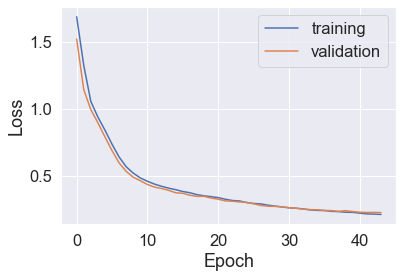

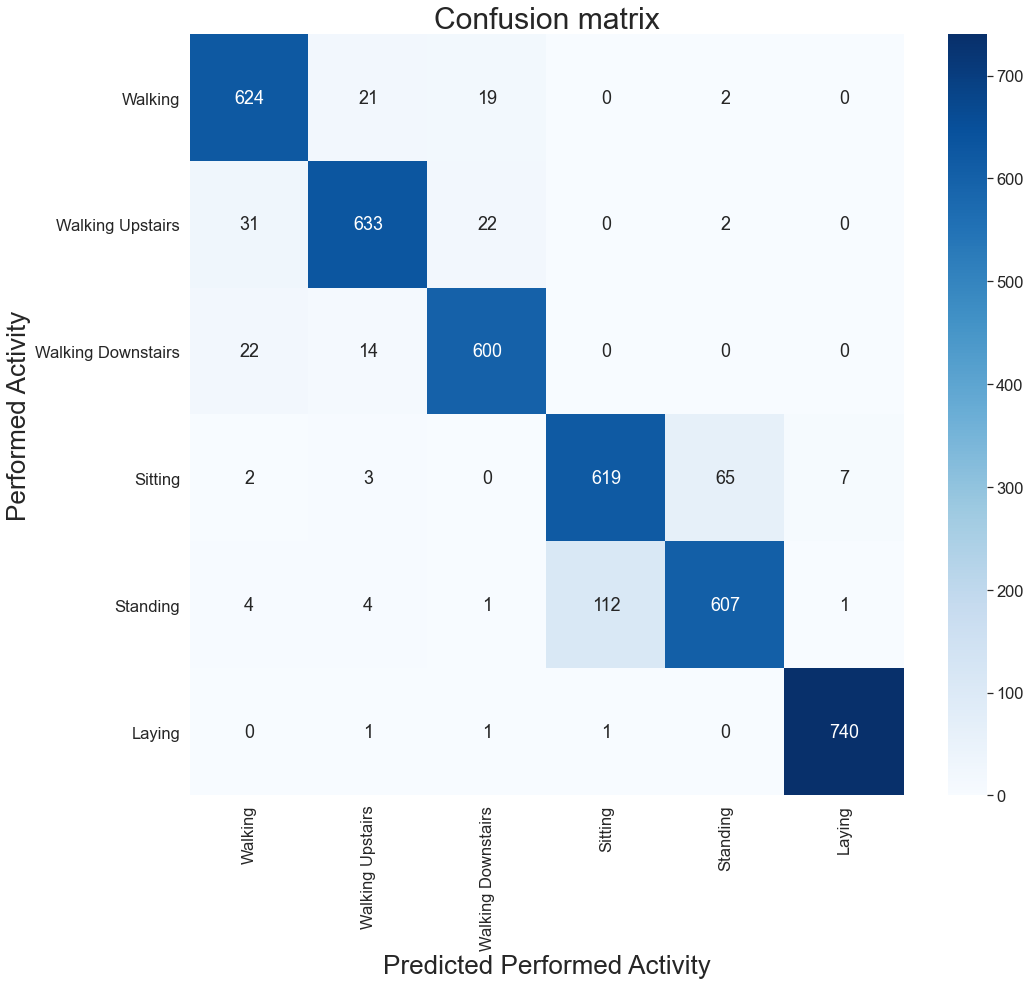

In [127]:
model_data_UCI(X_train_UCI_1_25,y_test_UCI_1_25,y_train_cat_UCI_1_25,X_test_UCI_1_25,y_test_cat_UCI_1_25,16,1000)

Model: "sequential_62"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_124 (Conv2D)         (None, 7, 7, 16)          2416      
                                                                 
 max_pooling2d_124 (MaxPooli  (None, 3, 3, 16)         0         
 ng2D)                                                           
                                                                 
 conv2d_125 (Conv2D)         (None, 3, 3, 32)          4640      
                                                                 
 max_pooling2d_125 (MaxPooli  (None, 1, 1, 32)         0         
 ng2D)                                                           
                                                                 
 flatten_62 (Flatten)        (None, 32)                0         
                                                                 
 dense_124 (Dense)           (None, 100)             

Epoch 48/1000
25/25 [==============================] - 1s 36ms/step - loss: 0.1701 - accuracy: 0.9375 - val_loss: 0.1953 - val_accuracy: 0.9298
Epoch 49/1000
25/25 [==============================] - 1s 36ms/step - loss: 0.1688 - accuracy: 0.9386 - val_loss: 0.1947 - val_accuracy: 0.9328
Epoch 50/1000
195/195 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1016
           1       0.92      0.97      0.95       974
           2       0.96      0.94      0.95       934
           3       0.85      0.89      0.87      1057
           4       0.88      0.85      0.87      1118
           5       1.00      0.99      1.00      1138

    accuracy                           0.93      6237
   macro avg       0.93      0.93      0.93      6237
weighted avg       0.93      0.93      0.93      6237



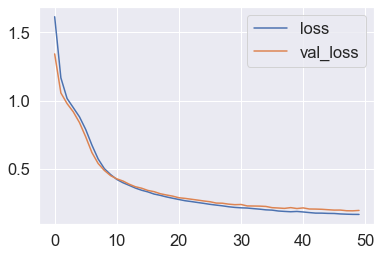

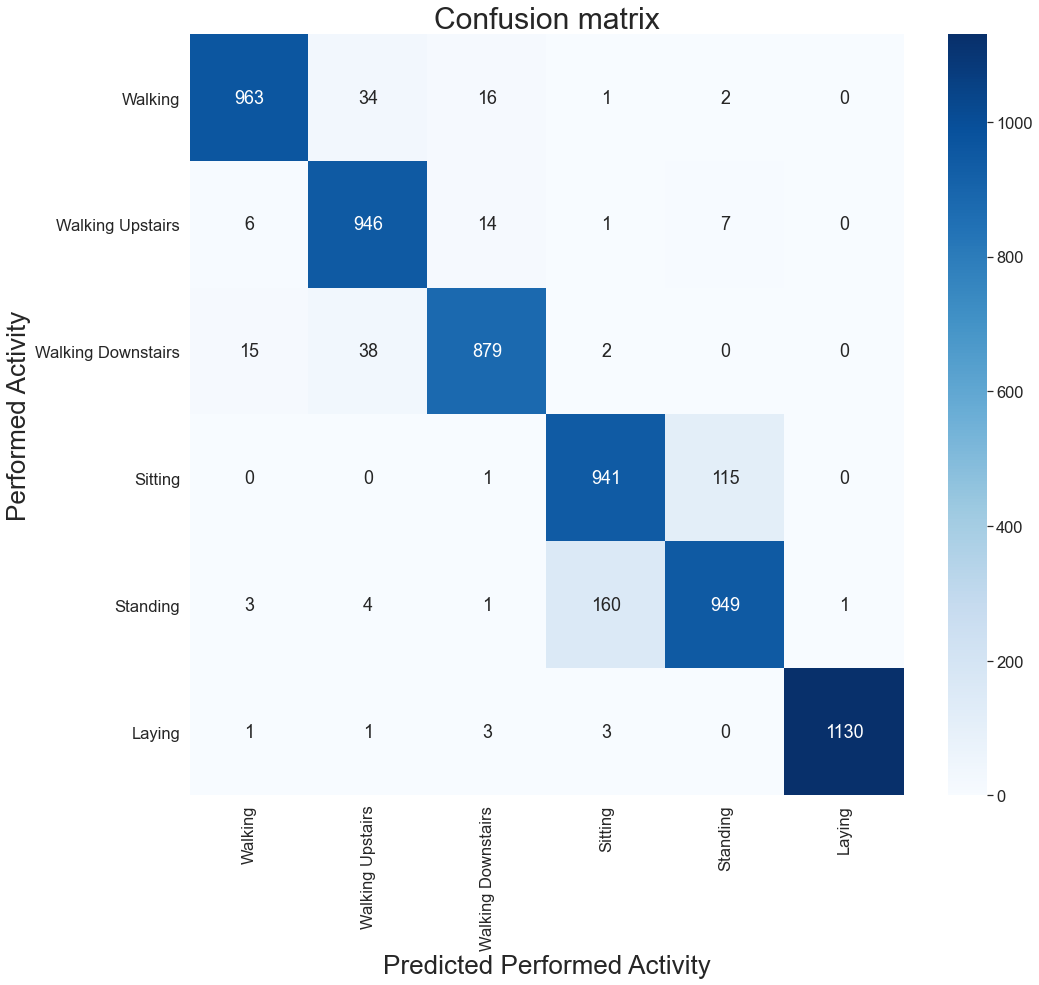

In [84]:
model_data_UCI(X_train_UCI_1_50,y_test_UCI_1_50,y_train_cat_UCI_1_50,X_test_UCI_1_50,y_test_cat_UCI_1_50,16,1000)

Model: "sequential_63"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_126 (Conv2D)         (None, 7, 7, 16)          2416      
                                                                 
 max_pooling2d_126 (MaxPooli  (None, 3, 3, 16)         0         
 ng2D)                                                           
                                                                 
 conv2d_127 (Conv2D)         (None, 3, 3, 32)          4640      
                                                                 
 max_pooling2d_127 (MaxPooli  (None, 1, 1, 32)         0         
 ng2D)                                                           
                                                                 
 flatten_63 (Flatten)        (None, 32)                0         
                                                                 
 dense_126 (Dense)           (None, 100)             

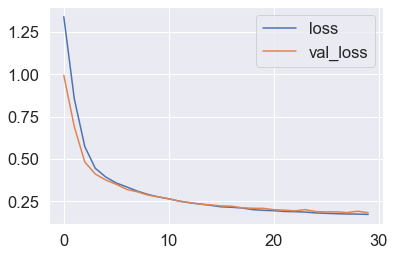

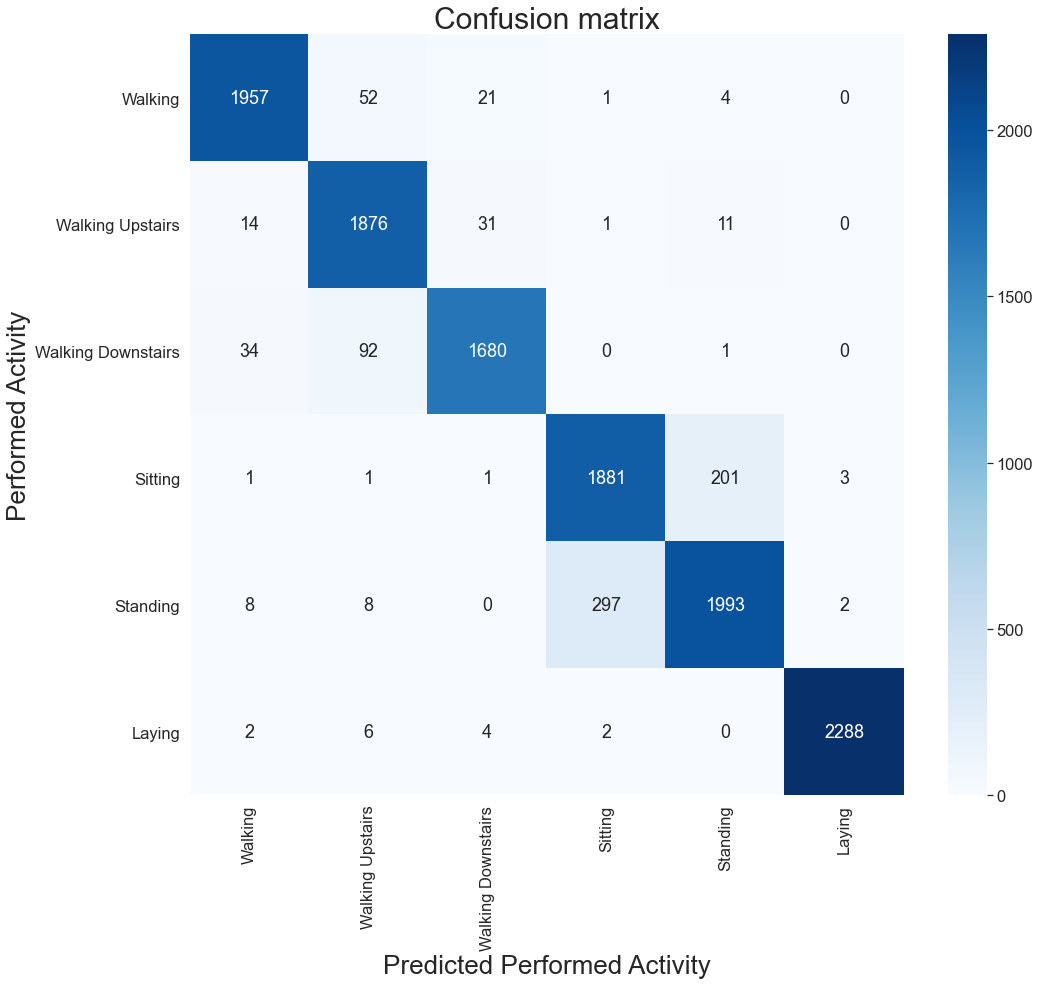

In [85]:
model_data_UCI(X_train_UCI_1_75,y_test_UCI_1_75,y_train_cat_UCI_1_75,X_test_UCI_1_75,y_test_cat_UCI_1_75,16,1000)

### 1.5 Second

Model: "sequential_60"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_120 (Conv2D)         (None, 9, 9, 20)          3020      
                                                                 
 max_pooling2d_120 (MaxPooli  (None, 4, 4, 20)         0         
 ng2D)                                                           
                                                                 
 conv2d_121 (Conv2D)         (None, 4, 4, 40)          7240      
                                                                 
 max_pooling2d_121 (MaxPooli  (None, 2, 2, 40)         0         
 ng2D)                                                           
                                                                 
 flatten_60 (Flatten)        (None, 160)               0         
                                                                 
 dense_120 (Dense)           (None, 100)             

78/78 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       388
           1       0.92      0.91      0.92       394
           2       0.94      0.90      0.92       367
           3       0.84      0.90      0.87       440
           4       0.90      0.81      0.85       451
           5       0.99      1.00      0.99       455

    accuracy                           0.91      2495
   macro avg       0.92      0.91      0.91      2495
weighted avg       0.91      0.91      0.91      2495



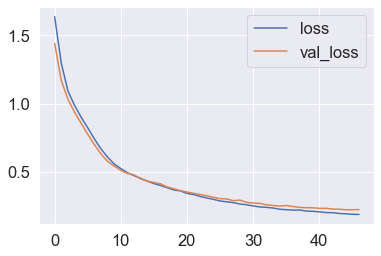

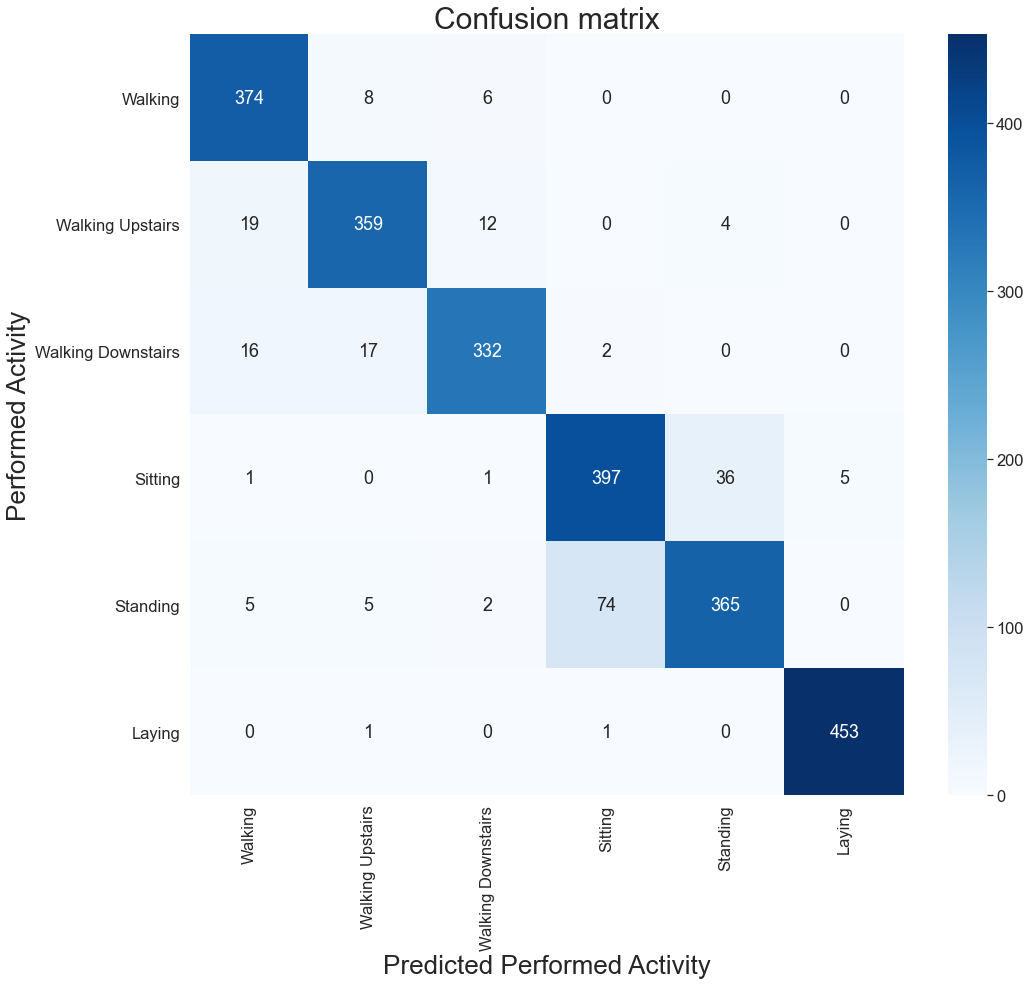

In [82]:
model_data_UCI(X_train_UCI_1_5_25,y_test_UCI_1_5_25,y_train_cat_UCI_1_5_25,X_test_UCI_1_5_25,y_test_cat_UCI_1_5_25,20,1000)

Model: "sequential_58"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_116 (Conv2D)         (None, 9, 9, 20)          3020      
                                                                 
 max_pooling2d_116 (MaxPooli  (None, 4, 4, 20)         0         
 ng2D)                                                           
                                                                 
 conv2d_117 (Conv2D)         (None, 4, 4, 40)          7240      
                                                                 
 max_pooling2d_117 (MaxPooli  (None, 2, 2, 40)         0         
 ng2D)                                                           
                                                                 
 flatten_58 (Flatten)        (None, 160)               0         
                                                                 
 dense_116 (Dense)           (None, 100)             

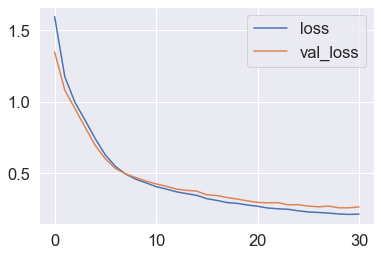

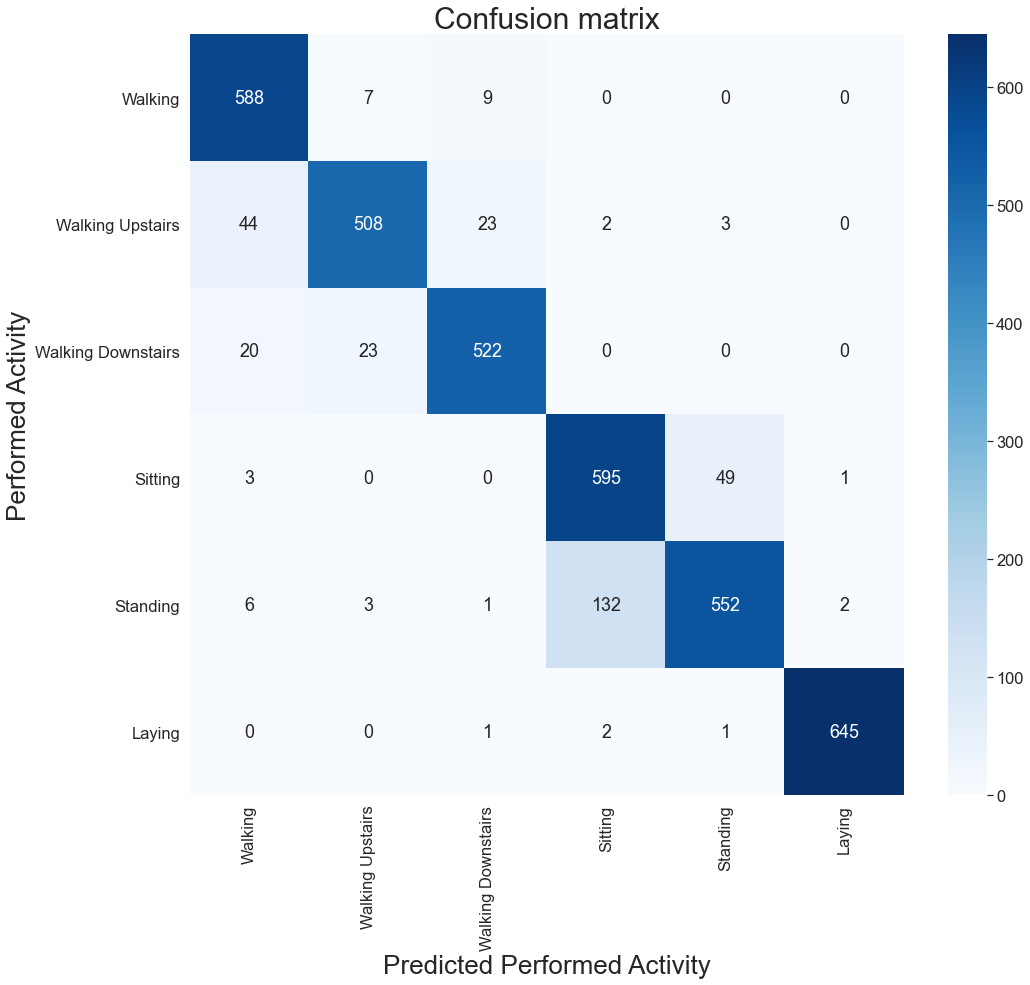

In [80]:
model_data_UCI(X_train_UCI_1_5_50,y_test_UCI_1_5_50,y_train_cat_UCI_1_5_50,X_test_UCI_1_5_50,y_test_cat_UCI_1_5_50,20,1000)

Model: "sequential_59"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_118 (Conv2D)         (None, 9, 9, 20)          3020      
                                                                 
 max_pooling2d_118 (MaxPooli  (None, 4, 4, 20)         0         
 ng2D)                                                           
                                                                 
 conv2d_119 (Conv2D)         (None, 4, 4, 40)          7240      
                                                                 
 max_pooling2d_119 (MaxPooli  (None, 2, 2, 40)         0         
 ng2D)                                                           
                                                                 
 flatten_59 (Flatten)        (None, 160)               0         
                                                                 
 dense_118 (Dense)           (None, 100)             

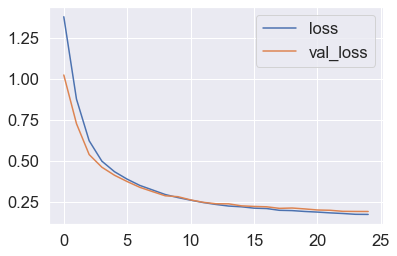

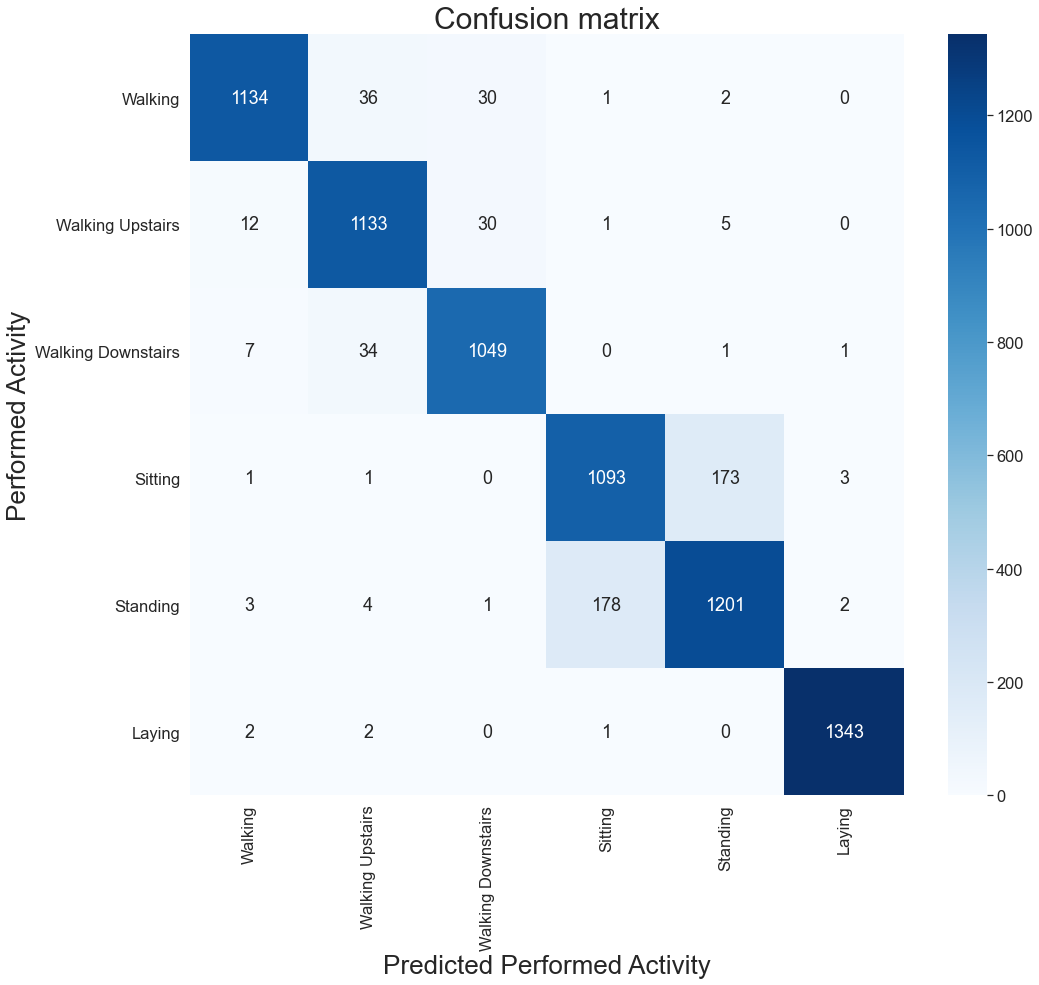

In [81]:
model_data_UCI(X_train_UCI_1_5_75,y_test_UCI_1_5_75,y_train_cat_UCI_1_5_75,X_test_UCI_1_5_75,y_test_cat_UCI_1_5_75,20,1000)

### 2 Second

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 10, 10, 24)        3624      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 24)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 5, 5, 48)          10416     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 2, 2, 48)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 192)               0         
                                                                 
 dense_4 (Dense)             (None, 100)              

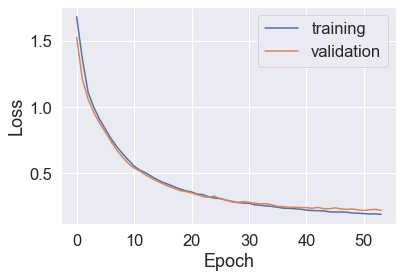

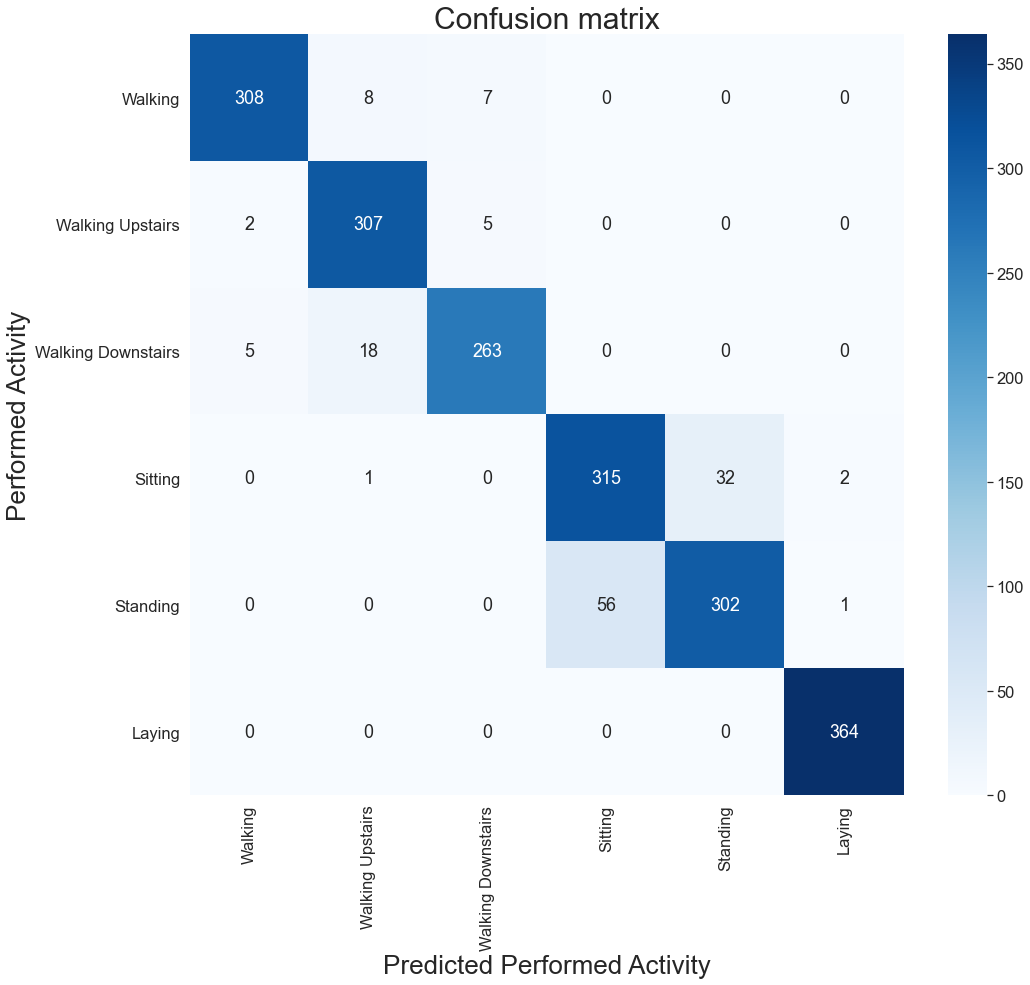

In [16]:
model_data_UCI(X_train_UCI_2_25,y_test_UCI_2_25,y_train_cat_UCI_2_25,X_test_UCI_2_25,y_test_cat_UCI_2_25,24,1000)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 10, 10, 24)        3624      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 5, 5, 24)         0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 5, 5, 48)          10416     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 2, 2, 48)         0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 192)               0         
                                                                 
 dense_12 (Dense)            (None, 100)              

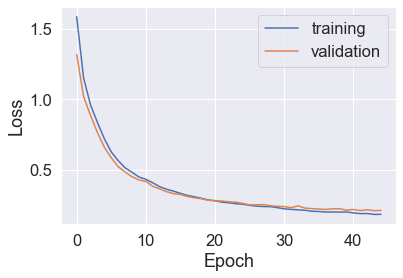

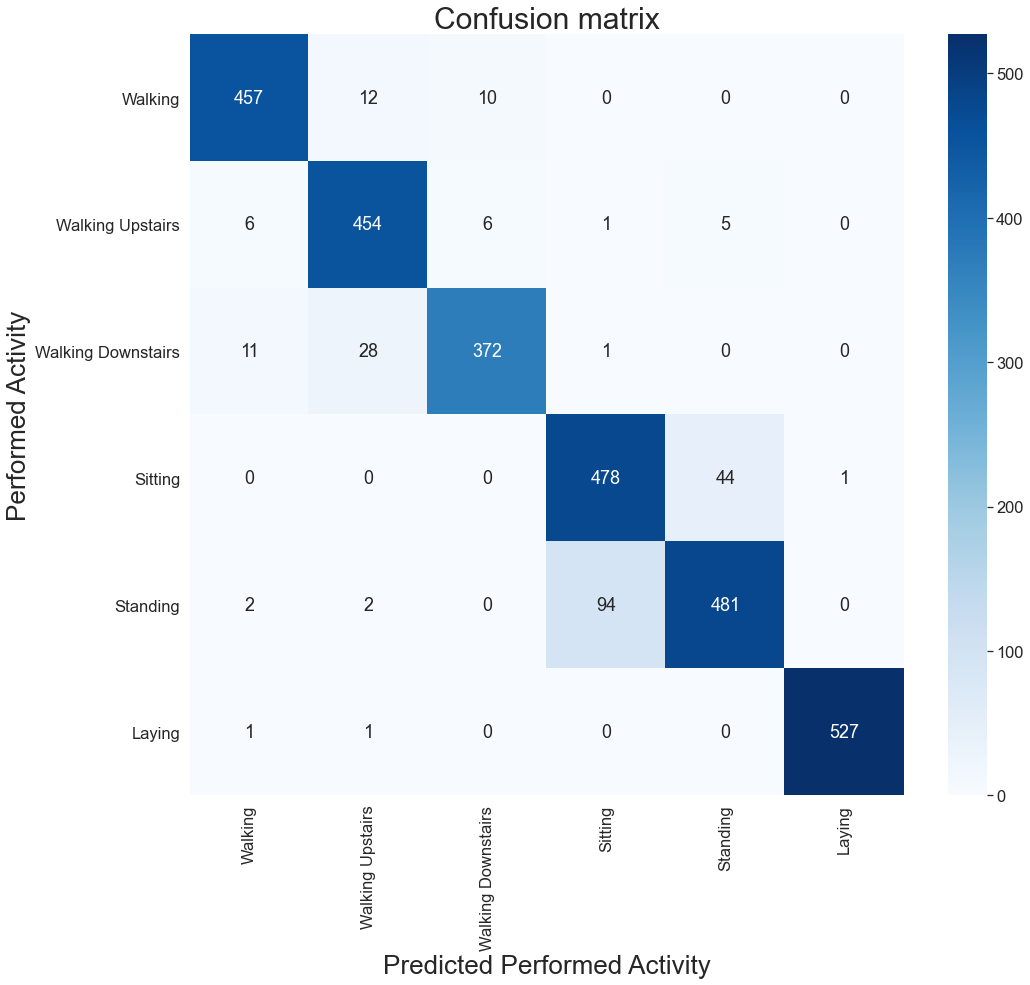

In [20]:
model_data_UCI(X_train_UCI_2_50,y_test_UCI_2_50,y_train_cat_UCI_2_50,X_test_UCI_2_50,y_test_cat_UCI_2_50,24,1000)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 10, 10, 24)        3624      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 5, 5, 24)         0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 5, 5, 48)          10416     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 2, 2, 48)         0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 192)               0         
                                                                 
 dense_10 (Dense)            (None, 100)              

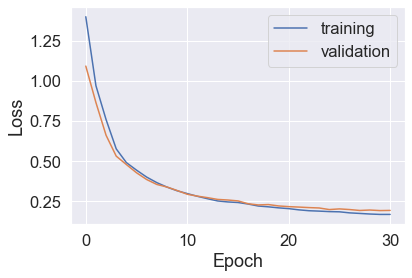

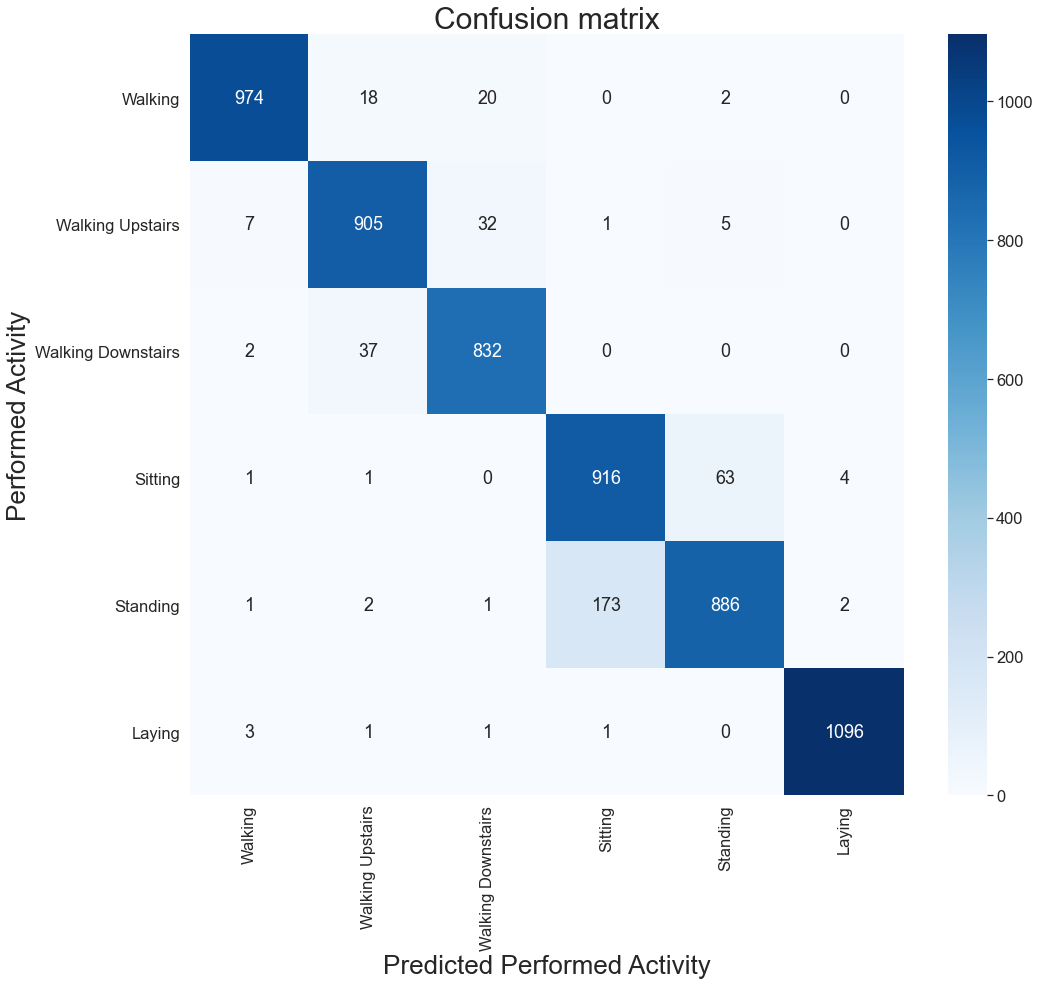

In [19]:
model_data_UCI(X_train_UCI_2_75,y_test_UCI_2_75,y_train_cat_UCI_2_75,X_test_UCI_2_75,y_test_cat_UCI_2_75,24,1000)

### 2.5 Second

Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_90 (Conv2D)          (None, 10, 10, 28)        4228      
                                                                 
 max_pooling2d_90 (MaxPoolin  (None, 5, 5, 28)         0         
 g2D)                                                            
                                                                 
 conv2d_91 (Conv2D)          (None, 5, 5, 56)          14168     
                                                                 
 max_pooling2d_91 (MaxPoolin  (None, 2, 2, 56)         0         
 g2D)                                                            
                                                                 
 flatten_45 (Flatten)        (None, 224)               0         
                                                                 
 dense_90 (Dense)            (None, 100)             

8/8 [==============================] - 1s 108ms/step - loss: 0.2063 - accuracy: 0.9227 - val_loss: 0.2342 - val_accuracy: 0.9138
Epoch 49/1000
8/8 [==============================] - 1s 111ms/step - loss: 0.2026 - accuracy: 0.9266 - val_loss: 0.2228 - val_accuracy: 0.9299
Epoch 50/1000
8/8 [==============================] - 1s 114ms/step - loss: 0.1973 - accuracy: 0.9282 - val_loss: 0.2270 - val_accuracy: 0.9238
Epoch 51/1000
8/8 [==============================] - 1s 107ms/step - loss: 0.1959 - accuracy: 0.9273 - val_loss: 0.2216 - val_accuracy: 0.9324
Epoch 52/1000
8/8 [==============================] - 1s 123ms/step - loss: 0.1935 - accuracy: 0.9306 - val_loss: 0.2206 - val_accuracy: 0.9274
Epoch 53/1000
8/8 [==============================] - 1s 123ms/step - loss: 0.1880 - accuracy: 0.9336 - val_loss: 0.2185 - val_accuracy: 0.9284
Epoch 54/1000
8/8 [==============================] - 1s 121ms/step - loss: 0.1854 - accuracy: 0.9336 - val_loss: 0.2166 - val_accuracy: 0.9309
Epoch 55/1000

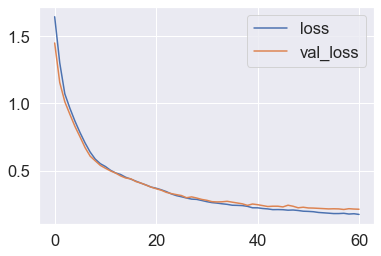

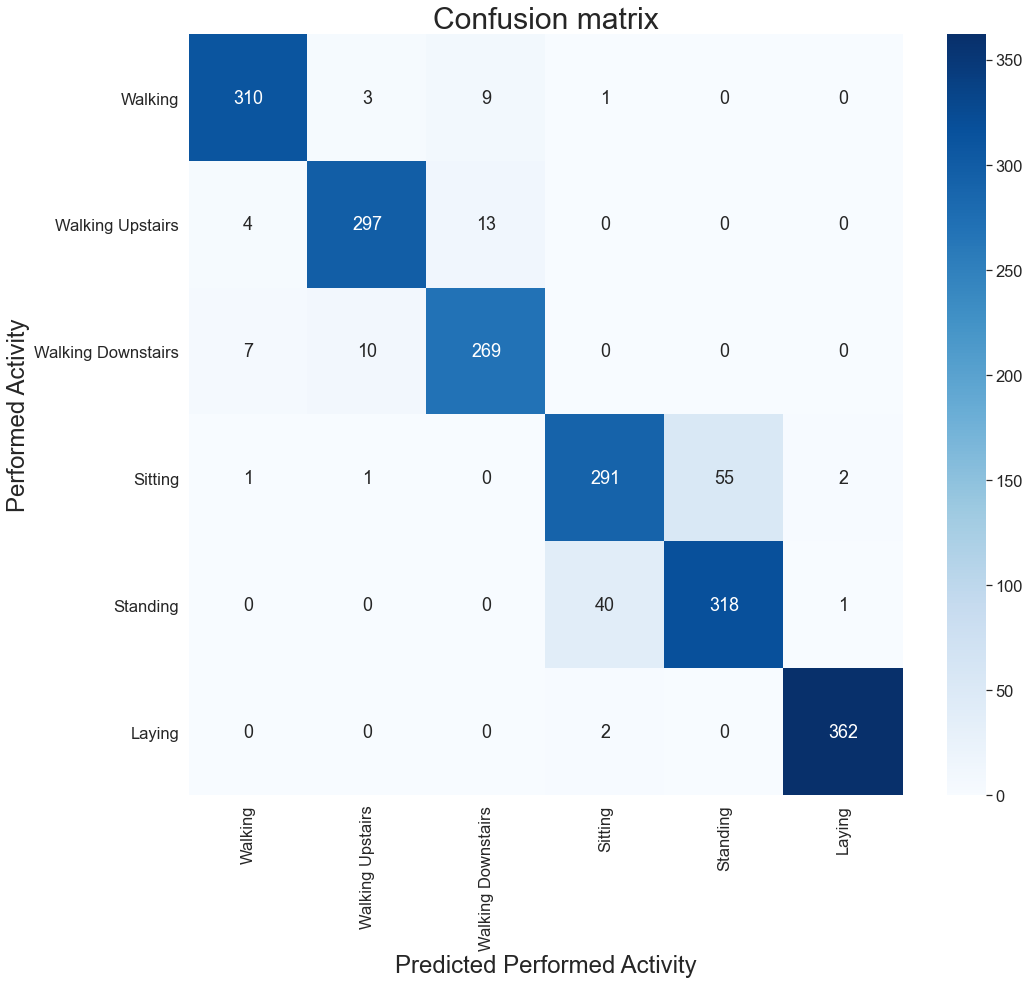

In [61]:
model_data_UCI(X_train_UCI_2_5_25,y_test_UCI_2_5_25,y_train_cat_UCI_2_5_25,X_test_UCI_2_5_25,y_test_cat_UCI_2_5_25,28,1000)

Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_94 (Conv2D)          (None, 10, 10, 28)        4228      
                                                                 
 max_pooling2d_94 (MaxPoolin  (None, 5, 5, 28)         0         
 g2D)                                                            
                                                                 
 conv2d_95 (Conv2D)          (None, 5, 5, 56)          14168     
                                                                 
 max_pooling2d_95 (MaxPoolin  (None, 2, 2, 56)         0         
 g2D)                                                            
                                                                 
 flatten_47 (Flatten)        (None, 224)               0         
                                                                 
 dense_94 (Dense)            (None, 100)             

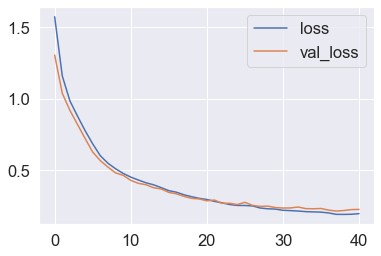

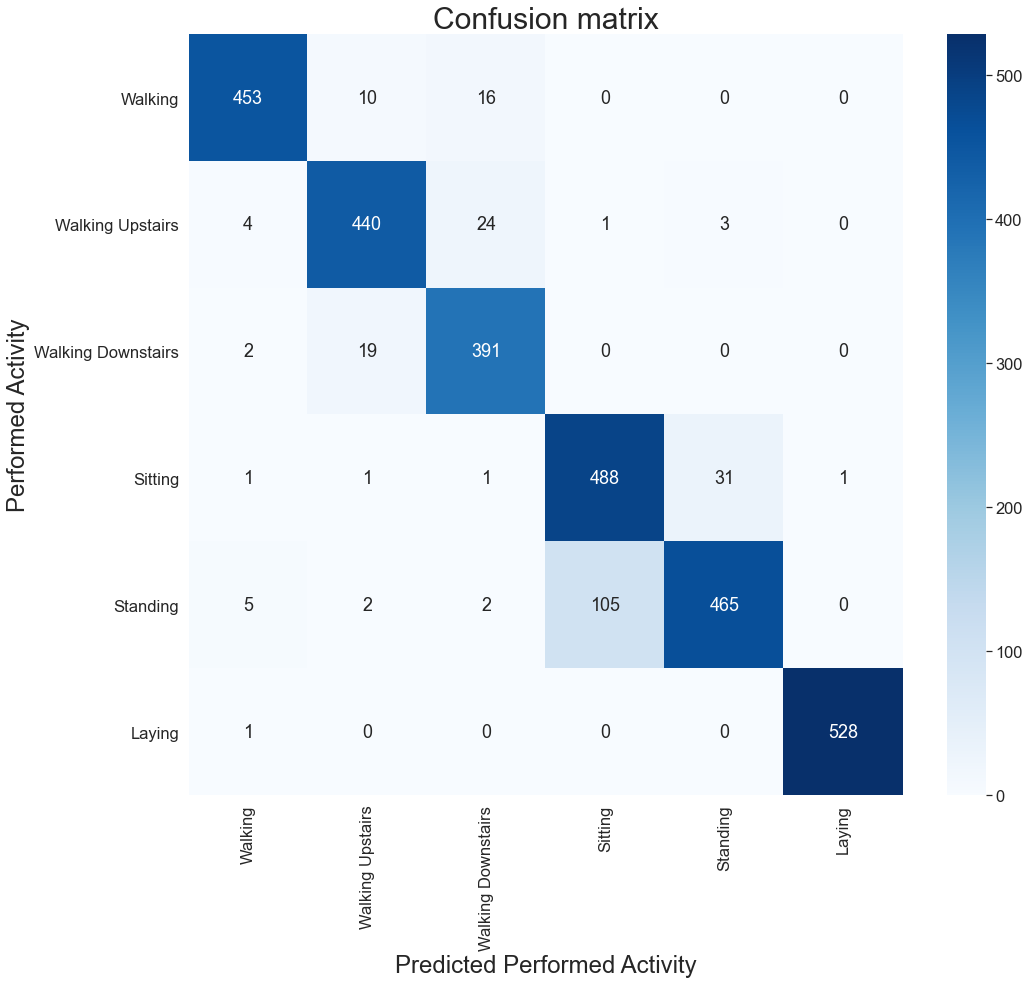

In [63]:
model_data_UCI(X_train_UCI_2_5_50,y_test_UCI_2_5_50,y_train_cat_UCI_2_5_50,X_test_UCI_2_5_50,y_test_cat_UCI_2_5_50,28,1000)

Model: "sequential_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_98 (Conv2D)          (None, 11, 11, 28)        4228      
                                                                 
 max_pooling2d_98 (MaxPoolin  (None, 5, 5, 28)         0         
 g2D)                                                            
                                                                 
 conv2d_99 (Conv2D)          (None, 5, 5, 56)          14168     
                                                                 
 max_pooling2d_99 (MaxPoolin  (None, 2, 2, 56)         0         
 g2D)                                                            
                                                                 
 flatten_49 (Flatten)        (None, 224)               0         
                                                                 
 dense_98 (Dense)            (None, 100)             

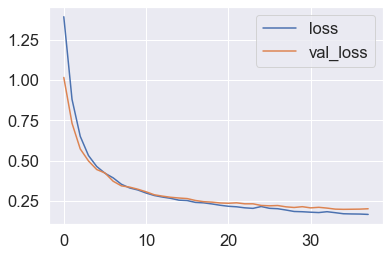

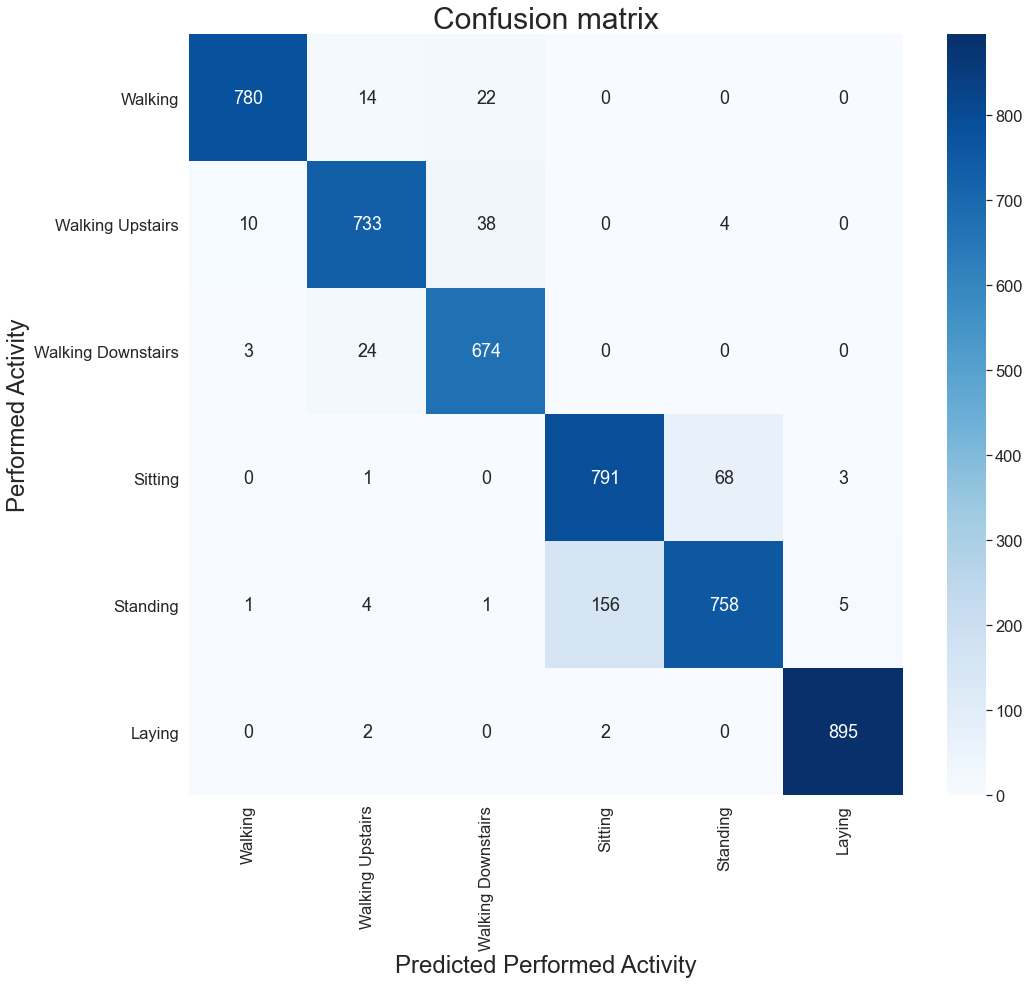

In [65]:
model_data_UCI(X_train_UCI_2_5_75,y_test_UCI_2_5_75,y_train_cat_UCI_2_5_75,X_test_UCI_2_5_75,y_test_cat_UCI_2_5_75,28,1000)